In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
df = pd.read_excel('finalData.xlsx')

In [3]:
df = df[:3000]

In [4]:
df.label.value_counts()

label
0.0    2267
1.0     733
Name: count, dtype: int64

In [5]:
df.shape

(3000, 2)

In [6]:
df = df.sample(frac = 1)

In [7]:
df.head()

,text,label
646,"I hate that every time I worry again, stay up ...",1.0
2524,Holidays become rp tiktok ah,0.0
1093,"join 62 resign 71, what is this Â£",0.0
2920,/ae/ Is Myne ready to be the highest viewers o...,0.0
1052,"ded, Wednesday presentation of 2 cases :')",0.0


In [8]:
df.isnull().sum()

text     8
label    0
dtype: int64

In [9]:
df.dropna()

,text,label
646,"I hate that every time I worry again, stay up ...",1.0
2524,Holidays become rp tiktok ah,0.0
1093,"join 62 resign 71, what is this Â£",0.0
2920,/ae/ Is Myne ready to be the highest viewers o...,0.0
1052,"ded, Wednesday presentation of 2 cases :')",0.0
...,...,...
2827,/. crazy i just woke up,0.0
1590,So far taxi drivers >>> mouse,0.0
2017,"I'm sure today's class will be long, but it's ...",0.0
218,Unsettled !! That's when there is a test. But ...,1.0


<Axes: ylabel='count'>

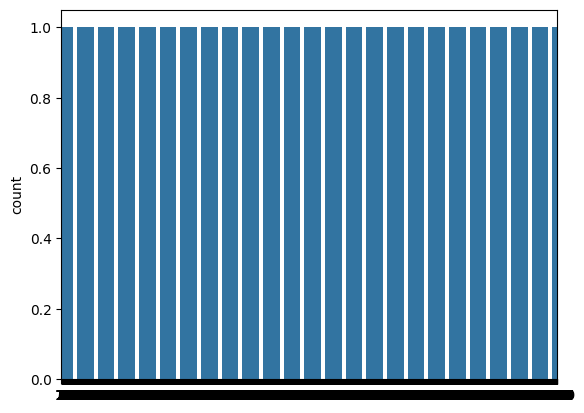

In [10]:
sns.countplot(df.label)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
lm = WordNetLemmatizer()

In [12]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
def text_transformation(col):
    corpus = []
    for token in col:
        alphabet = re.sub('[^a-zA-Z]',' ',str(token))
        alphabet = alphabet.lower()
        alphabet = alphabet.split()
        a_lemmas = [lm.lemmatize(word) for word in alphabet if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in a_lemmas))
    return corpus

In [14]:
df['cleaned'] = text_transformation(df.text)

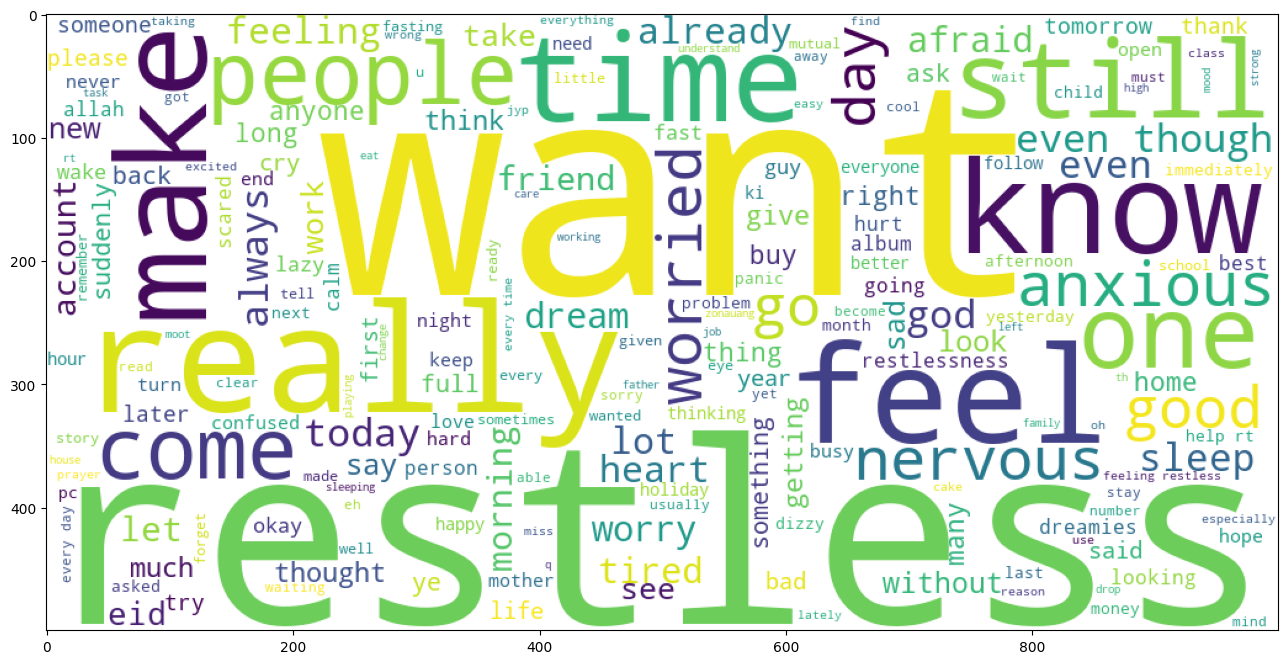

In [15]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned'].head(2000):
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [16]:
X = df.cleaned
y = df.label.astype(int)

In [17]:
vect = TfidfVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2),use_idf = True)

In [18]:
X_tfidf =vect.fit_transform(X).toarray()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,stratify = y,test_size = 0.2,random_state = 1)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


lr_model = LogisticRegression(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
knn_model = KNeighborsClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'KNN']
ml_models = [lr_model,dt_model,rf_model,mnb_model, knn_model]

In [37]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

print(f"Number of trained models: {len(trained_ml_models)}")
print(f"Number of model names: {len(model_names)}")

pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

Number of trained models: 5
Number of model names: 5


In [39]:
performance_matrix

,Precision,Recall,F1 Score
Logistic Regression,94.37,94.33,94.17
Decision Tree,95.98,96.00,95.99
Random Forest,96.38,96.33,96.26
Naive Bayes,88.79,86.83,84.94
KNN,82.37,77.00,68.35


In [40]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

In [41]:
data_matrix

,Model,Precision,Recall,F1 Score
0,Logistic Regression,94.37,94.33,94.17
1,Decision Tree,95.98,96.00,95.99
2,Random Forest,96.38,96.33,96.26
3,Naive Bayes,88.79,86.83,84.94
4,KNN,82.37,77.00,68.35


C:\Users\Admin\AppData\Local\Temp\ipykernel_16880\3163055031.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(model_names, rotation=45)


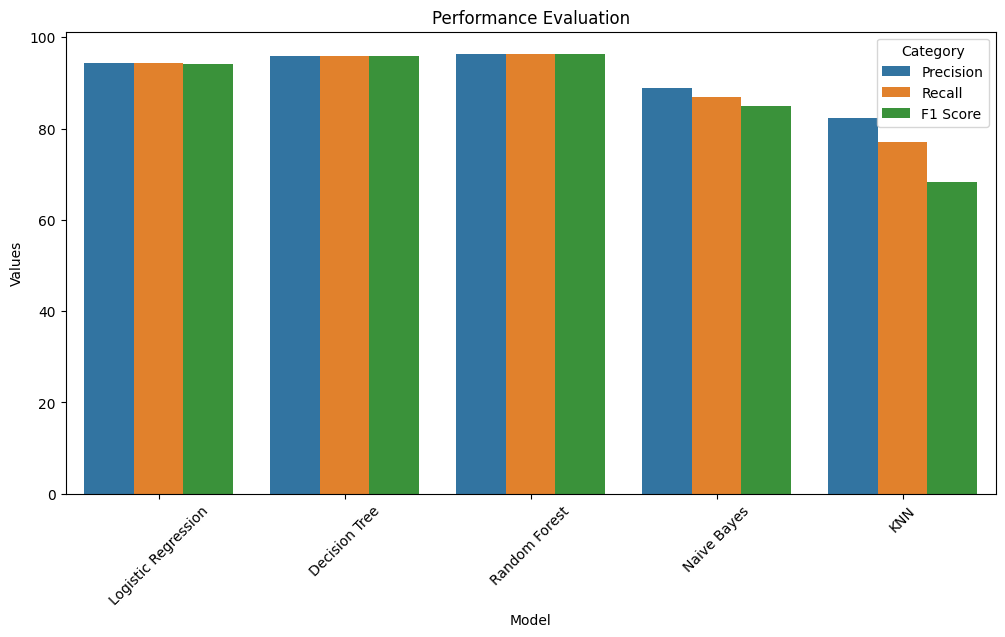

In [42]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model') 
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45)
plt.show()